In [1]:
import pandas as pd

In [9]:
# Dataset loading

# Reading csv files
gddAprOct = pd.read_csv("dataset/10_4231_R72F7KK2/Agro-Climatic Data by County/gddAprOct.csv")
gridInfo = pd.read_csv("dataset/10_4231_R72F7KK2/Agro-Climatic Data by County/gridInfo.csv")
yielddata = pd.read_csv("dataset/10_4231_R72F7KK2/Agro-Climatic Data by County/yielddata.csv")

# Reading txt files
txt_data = ''
with open('dataset/CAF_Sensor_Dataset_2/CAF_CropCodes.txt','r') as file:
    txt_data = file.read()

Code	Crop
Fallow	no crop
SB	spring barley
SC	spring canola
SL	spring legume (chickpea)
SP	spring pea
SW	spring wheat
WB	winter barley
WC	winter canola
WL	winter legume (chickpea)
WT	winter triticale
WW	winter wheat


In [3]:
# Earlier analysis

# Dataset-1
gddAprOct.head()
gddAprOct['year'].head()
gddAprOct['year'].min()
gddAprOct['year'].max()
gddAprOct.shape
gddAprOct['gddm60'].isna().sum()
gddAprOct.max().max()
len(gddAprOct.loc[gddAprOct['gddm5'] == 0.0])

# Dataset-2
gridInfo.head()
gridInfo.shape

# Dataset-3
yielddata.head()
yielddata['corn'].isna().sum()
yielddata.shape

,stco,year,gddm60,gddm59,gddm58,gddm57,gddm56,gddm55,gddm54,gddm53,...,gddp51,gddp52,gddp53,gddp54,gddp55,gddp56,gddp57,gddp58,gddp59,gddp60
0,1001,1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


AxesSubplot(0.125,0.125;0.62x0.755)


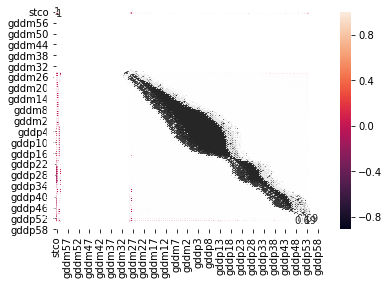

In [42]:
import seaborn as sns 

# Analysis harness
analysis_df = gddAprOct

# To show different metrics
# analysis_df.info()
# analysis_df.describe()

# To get null values
# analysis_df.isnull().sum()

# Finding co-relation
# correlation_matrix = analysis_df.corr().round(2)
# sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
# converts txt to csv files
import csv 

def txt_to_csv(txt_file):
    csv_file = txt_file.split('/')[-1].split('.')[0] + '.csv'
    csv_file = '/'.join(txt_file.split('/')[:-1]) + '/' + csv_file
    
    inp_data = list()
    with open(txt_file, 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        inp_data = [line.split("\t") for line in stripped if line]
    
    # creating dataframe
    df = pd.DataFrame(inp_data[1:-2], columns=inp_data[0])
    print(df.head())
    df.to_csv(csv_file)

In [36]:
txt_to_csv('dataset/CAF_Sensor_Dataset_2/CAF_CropID.txt')

  Field Strip Y2007   Y2008 Y2009 Y2010 Y2011 Y2012 Y2013 Y2014 Y2015 Y2016
0     A     1    WT      SW    WW    WW    SL    WW    WW    SL    WW    SC
1     B     1    SW      WW    SC    SL    WW    WW    SL    WW    SC    SC
2     C     1    WW  Fallow    WC    WW    SW    SL    WW    SW    SL   WW*
3     A     2    WL      SW    WW    SW    SL    WW    SW    SL    WW    SC
4     B     2    SW      WW    WP    SL    WW    WW    SL    WW    SC    SC
